# Credit Card Fraud Detection

##### The goal of this task is to detect fraudulent credit card transactions from a highly imbalanced dataset. Fraud cases are rare, so special handling of class imbalance and careful evaluation metrics are required.

## Import Liabaries

In [44]:
!pip show scikit-learn imbalanced-learn

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


# Resampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Name: scikit-learn
Version: 1.7.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License-Expression: BSD-3-Clause
Location: C:\Users\bbuser\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, sklearn-compat
---
Name: imbalanced-learn
Version: 0.14.0
Summary: Toolbox for imbalanced dataset in machine learning
Home-page: https://imbalanced-learn.org/
Author: 
Author-email: "G. Lemaitre" <g.lemaitre58@gmail.com>, "C. Aridas" <ichkoar@gmail.com>
License: 
Location: C:\Users\bbuser\anaconda3\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 


## Loads Dataset

In [7]:
DATA_PATH = r"C:\Users\bbuser\Desktop\Jupyter\creditcard.csv"
# Load the CSV into a pandas DataFrame
df = pd.read_csv(DATA_PATH)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
print('\nShape: ', df.shape)
print('\nInfo:')
df.info()


Shape:  (284807, 31)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-

In [9]:
print('\nMissing values per column:')
df.isnull().sum()


Missing values per column:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
print('\nStatistical summary (numeric features):')
df.describe()


Statistical summary (numeric features):


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Class imbalance

In [14]:
print('\nClass distribution:')
print(df['Class'].value_counts())


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [15]:
print('\nClass distribution (percentage):')
print(df['Class'].value_counts(normalize=True) * 100)


Class distribution (percentage):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


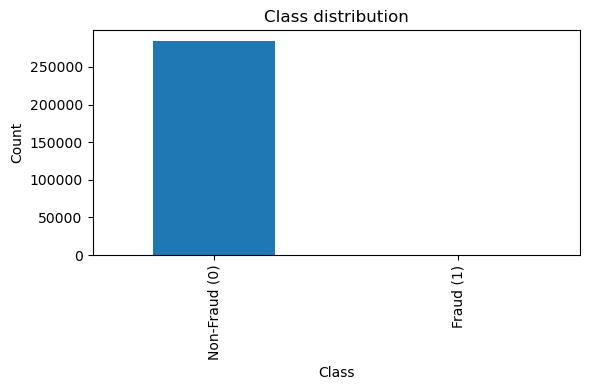

In [16]:
# Plot class imbalance
plt.figure(figsize=(6,4))
ax = df['Class'].value_counts().plot(kind='bar')
ax.set_xticklabels(['Non-Fraud (0)','Fraud (1)'])
plt.title('Class distribution')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

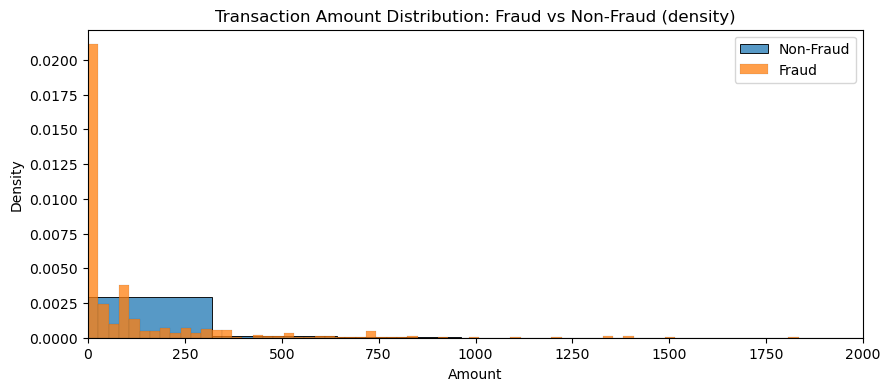

In [17]:
# Distribution of Amount for fraud vs not
plt.figure(figsize=(10,4))
sns.histplot(df[df['Class']==0]['Amount'], label='Non-Fraud', kde=False, stat='density', bins=80)
sns.histplot(df[df['Class']==1]['Amount'], label='Fraud', kde=False, stat='density', bins=80)
plt.legend()
plt.title('Transaction Amount Distribution: Fraud vs Non-Fraud (density)')
plt.xlim(0, 2000)
plt.show()

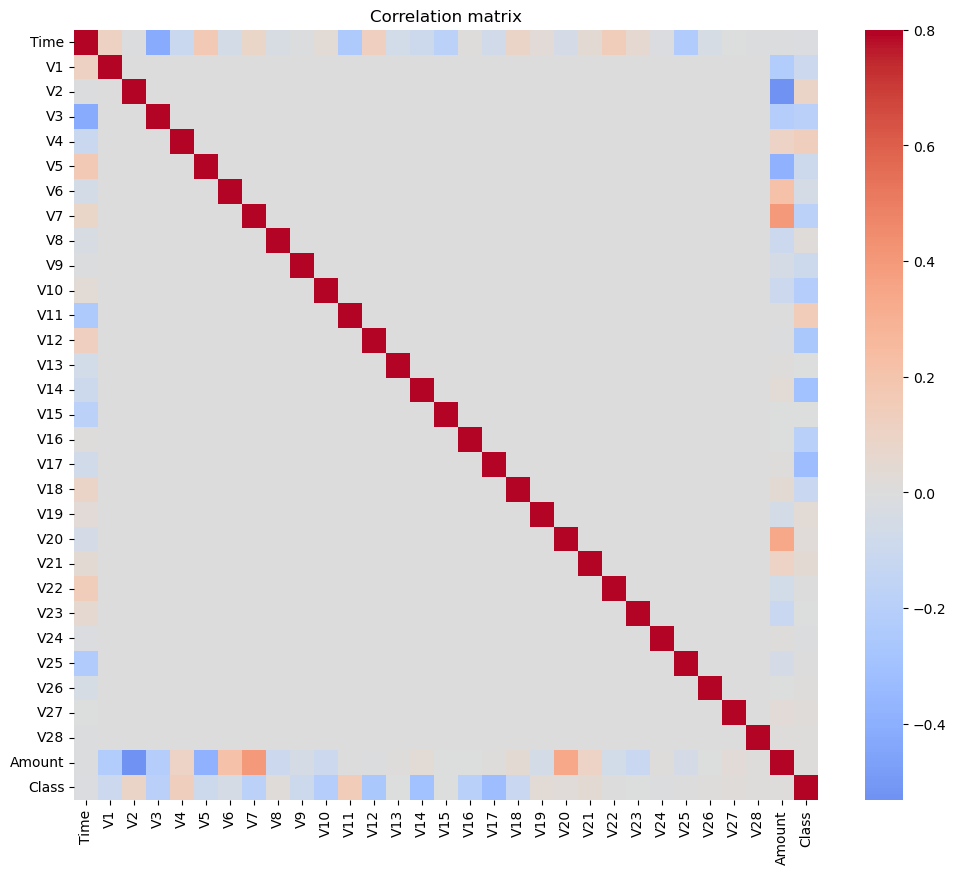

In [18]:
# Correlation matrix (heatmap) for a subset (to keep readable)
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, vmax=0.8)
plt.title('Correlation matrix')
plt.show()

##  Preprocessing 

In [20]:
# No missing values expected, but keep check
if df.isnull().sum().sum() == 0:
    print('No missing values detected.')   
else:
    print('Missing values found. Filling with median for numeric features.')
    df = df.fillna(df.median())

No missing values detected.


In [21]:
# Features & target
X = df.drop('Class', axis=1)
y = df['Class']

In [22]:
# Scale 'Amount' and 'Time' (others V1..V28 are already PCA components in this dataset)
scaler = StandardScaler()
X[['Time','Amount']] = scaler.fit_transform(X[['Time','Amount']])

In [23]:
# Train/test split with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
print('\nTrain class distribution:')
print(y_train.value_counts(normalize=True))


Train class distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64


In [26]:
print('\nTest class distribution:')
print(y_test.value_counts(normalize=True))


Test class distribution:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [28]:
# Train, Predict, and Evaluate 
from collections import OrderedDict


results = OrderedDict()


def evaluate_model(name, model, X_test, y_test, y_proba=None):
    y_pred = model.predict(X_test)
    if y_proba is None:
        # try predict_proba
        try:
            y_proba = model.predict_proba(X_test)[:,1]
        except Exception:
            # if not available (e.g., SVM with probability=False), use decision_function
            try:
                y_proba = model.decision_function(X_test)
            except Exception:
                y_proba = None
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    ap = average_precision_score(y_test, y_proba) if y_proba is not None else None
    results[name] = {
                'model': model,
                'y_pred': y_pred,
                'y_proba': y_proba,
                'confusion_matrix': cm,
                'classification_report': report,
                'roc_auc': roc_auc,
                'average_precision': ap
    }

    
    print(f"\n=== Evaluation: {name} ===")
    print('Confusion matrix:\n', cm)
    print('\nClassification report:\n', report)
    print('ROC AUC:', roc_auc)
    print('Average Precision (PR AUC):', ap)

## Baseline Models

### 1) Logistic Regression

In [29]:
lr = LogisticRegression(max_iter=1000, class_weight=None)
lr.fit(X_train, y_train)
evaluate_model('LogisticRegression (baseline)', lr, X_test, y_test)


=== Evaluation: LogisticRegression (baseline) ===
Confusion matrix:
 [[56851    13]
 [   35    63]]

Classification report:
               precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8289    0.6429    0.7241        98

    accuracy                         0.9992     56962
   macro avg     0.9142    0.8213    0.8619     56962
weighted avg     0.9991    0.9992    0.9991     56962

ROC AUC: 0.9572835078037969
Average Precision (PR AUC): 0.7439486441557351


### 2) Decision Tree

In [30]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
evaluate_model('DecisionTree (baseline)', dt, X_test, y_test)


=== Evaluation: DecisionTree (baseline) ===
Confusion matrix:
 [[56840    24]
 [   25    73]]

Classification report:
               precision    recall  f1-score   support

           0     0.9996    0.9996    0.9996     56864
           1     0.7526    0.7449    0.7487        98

    accuracy                         0.9991     56962
   macro avg     0.8761    0.8722    0.8741     56962
weighted avg     0.9991    0.9991    0.9991     56962

ROC AUC: 0.8722379497662881
Average Precision (PR AUC): 0.5610321985726947


### 3) Random Forest

In [31]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
evaluate_model('RandomForest (baseline)', rf, X_test, y_test)


=== Evaluation: RandomForest (baseline) ===
Confusion matrix:
 [[56859     5]
 [   18    80]]

Classification report:
               precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9412    0.8163    0.8743        98

    accuracy                         0.9996     56962
   macro avg     0.9704    0.9081    0.9371     56962
weighted avg     0.9996    0.9996    0.9996     56962

ROC AUC: 0.9630272515590367
Average Precision (PR AUC): 0.8733910547021404


### 4) XGBoost

In [32]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
evaluate_model('XGBoost (baseline)', xgb, X_test, y_test)

C:\Users\bbuser\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:49:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Evaluation: XGBoost (baseline) ===
Confusion matrix:
 [[56852    12]
 [   20    78]]

Classification report:
               precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56864
           1     0.8667    0.7959    0.8298        98

    accuracy                         0.9994     56962
   macro avg     0.9332    0.8979    0.9148     56962
weighted avg     0.9994    0.9994    0.9994     56962

ROC AUC: 0.9389517272862999
Average Precision (PR AUC): 0.7972912780329892


### 5) SVM (with probability=True for proba)

In [33]:
svm = SVC(kernel='rbf', probability=True, random_state=42)
# WARNING: SVM on full dataset can be slow; we're running it but you can skip or use a smaller sample.
svm.fit(X_train, y_train)
evaluate_model('SVM (baseline)', svm, X_test, y_test)


=== Evaluation: SVM (baseline) ===
Confusion matrix:
 [[56860     4]
 [   30    68]]

Classification report:
               precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56864
           1     0.9444    0.6939    0.8000        98

    accuracy                         0.9994     56962
   macro avg     0.9720    0.8469    0.8999     56962
weighted avg     0.9994    0.9994    0.9994     56962

ROC AUC: 0.9664333375443594
Average Precision (PR AUC): 0.8617353003012949


## ROC curves for all models 

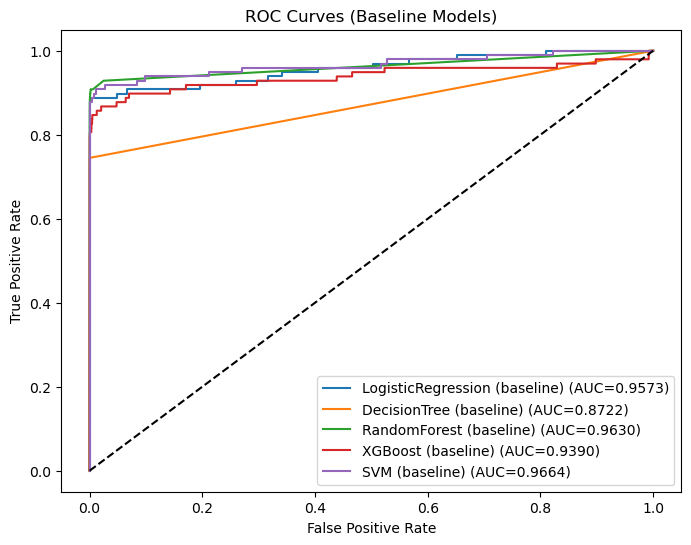

In [34]:
plt.figure(figsize=(8,6))
for name, info in results.items():
    y_proba = info['y_proba']
    if y_proba is None:
        continue
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={info['roc_auc']:.4f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Baseline Models)')
plt.legend()
plt.show()

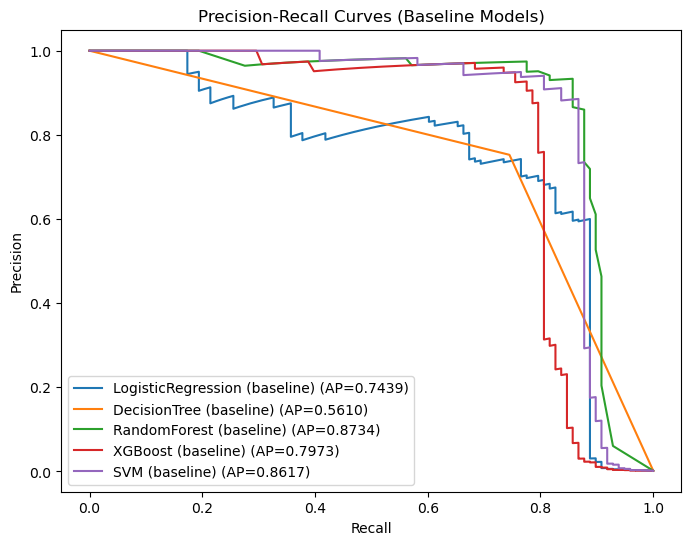

In [35]:
# Precision-Recall curves
plt.figure(figsize=(8,6))
for name, info in results.items():
    y_proba = info['y_proba']
    if y_proba is None:
        continue
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap = info['average_precision']
    plt.plot(recall, precision, label=f"{name} (AP={ap:.4f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (Baseline Models)')
plt.legend()
plt.show()

## Model Improvements

### 1) SMOTE oversampling on training data

In [36]:
print('\n--- Applying SMOTE to training set ---')
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print('After SMOTE, class distribution:', np.bincount(y_train_sm))


--- Applying SMOTE to training set ---


C:\Users\bbuser\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\bbuser\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\bbuser\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bbuser\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^

After SMOTE, class distribution: [227451 227451]


In [37]:
# Train RandomForest on SMOTE data as example
rf_sm = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_sm.fit(X_train_sm, y_train_sm)
evaluate_model('RandomForest + SMOTE', rf_sm, X_test, y_test)


=== Evaluation: RandomForest + SMOTE ===
Confusion matrix:
 [[56849    15]
 [   16    82]]

Classification report:
               precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8454    0.8367    0.8410        98

    accuracy                         0.9995     56962
   macro avg     0.9225    0.9182    0.9204     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC AUC: 0.973103297664029
Average Precision (PR AUC): 0.8747306414642819


### 2) Undersampling majority class

In [38]:
print('\n--- Applying Random Undersampling to training set ---')
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print('After undersampling, class distribution:', np.bincount(y_train_rus))


rf_rus = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_rus.fit(X_train_rus, y_train_rus)
evaluate_model('RandomForest + Undersampling', rf_rus, X_test, y_test)


--- Applying Random Undersampling to training set ---
After undersampling, class distribution: [394 394]

=== Evaluation: RandomForest + Undersampling ===
Confusion matrix:
 [[54827  2037]
 [    8    90]]

Classification report:
               precision    recall  f1-score   support

           0     0.9999    0.9642    0.9817     56864
           1     0.0423    0.9184    0.0809        98

    accuracy                         0.9641     56962
   macro avg     0.5211    0.9413    0.5313     56962
weighted avg     0.9982    0.9641    0.9801     56962

ROC AUC: 0.9776977722715422
Average Precision (PR AUC): 0.6952856989622043


In [39]:
# Decision threshold tuning example: use RF + SMOTE probabilities and choose threshold to maximize recall at acceptable precision
probs = rf_sm.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
# Compute F1 for thresholds
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-12)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
print(f"\nBest F1 threshold (RF+SMOTE) = {best_threshold:.4f}, F1={f1_scores[best_idx]:.4f}")


Best F1 threshold (RF+SMOTE) = 0.7700, F1=0.8588


In [40]:
# Apply threshold
y_pred_thresh = (probs >= best_threshold).astype(int)
cm_thresh = confusion_matrix(y_test, y_pred_thresh)
print('Confusion matrix at tuned threshold:\n', cm_thresh)
print('\nClassification report at tuned threshold:\n', classification_report(y_test, y_pred_thresh, digits=4))

Confusion matrix at tuned threshold:
 [[56861     3]
 [   22    76]]

Classification report at tuned threshold:
               precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9620    0.7755    0.8588        98

    accuracy                         0.9996     56962
   macro avg     0.9808    0.8877    0.9293     56962
weighted avg     0.9995    0.9996    0.9995     56962



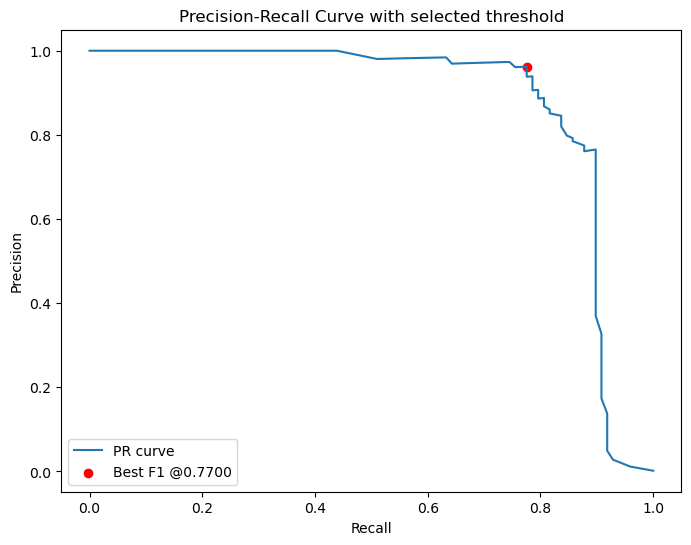

In [41]:
# Plot Precision-Recall with thresholds annotated (sample)
plt.figure(figsize=(8,6))
plt.plot(recalls, precisions, label='PR curve')
plt.scatter(recalls[best_idx], precisions[best_idx], c='r', label=f'Best F1 @{best_threshold:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with selected threshold')
plt.legend()
plt.show()

## Compare improved vs baseline 

In [42]:
print('\n--- Summary of model ROC AUC and Average Precision (PR AUC) ---')
for name, info in results.items():
    print(f"{name}: ROC AUC={info['roc_auc']:.4f}, AP={info['average_precision']:.4f}")

    
# Also show the improved ones
for improved in ['RandomForest + SMOTE', 'RandomForest + Undersampling']:
    info = results.get(improved)
    if info:
        print(f"{improved}: ROC AUC={info['roc_auc']:.4f}, AP={info['average_precision']:.4f}")
    else:
        # We evaluated them earlier but didn't add to results dict; evaluate now
        if improved == 'RandomForest + SMOTE':
            probs = rf_sm.predict_proba(X_test)[:,1]
            print(f"{improved}: ROC AUC={roc_auc_score(y_test, probs):.4f}, AP={average_precision_score(y_test, probs):.4f}")
        if improved == 'RandomForest + Undersampling':
            probs = rf_rus.predict_proba(X_test)[:,1]
            print(f"{improved}: ROC AUC={roc_auc_score(y_test, probs):.4f}, AP={average_precision_score(y_test, probs):.4f}")


--- Summary of model ROC AUC and Average Precision (PR AUC) ---
LogisticRegression (baseline): ROC AUC=0.9573, AP=0.7439
DecisionTree (baseline): ROC AUC=0.8722, AP=0.5610
RandomForest (baseline): ROC AUC=0.9630, AP=0.8734
XGBoost (baseline): ROC AUC=0.9390, AP=0.7973
SVM (baseline): ROC AUC=0.9664, AP=0.8617
RandomForest + SMOTE: ROC AUC=0.9731, AP=0.8747
RandomForest + Undersampling: ROC AUC=0.9777, AP=0.6953
RandomForest + SMOTE: ROC AUC=0.9731, AP=0.8747
RandomForest + Undersampling: ROC AUC=0.9777, AP=0.6953
